# Linear Discriminant Analysis

The general LDA approach is very similar to a Principal Component Analysis but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).

### Summarizing the LDA approach in 5 steps
Listed below are the 5 general steps for performing a linear discriminant analysis; we will explore them in more detail in the following sections.

Compute the d-dimensional mean vectors for the different classes from the dataset.

Compute the scatter matrices (in-between-class and within-class scatter matrix).

Compute the eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λ1,λ2,...,λd) for the scatter matrices.

Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W (where every column represents an eigenvector).

Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: Y=X × W (where X is a n×d-dimensional matrix representing the n samples, and y are the transformed n×k-dimensional samples in the new subspace).

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading the Data

In [38]:
df = pd.read_csv('Iris.csv')

In [39]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.drop(['Id'],axis=1,inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
X = df.drop(['Species'],axis=1)

In [43]:
y = df['Species'].values

In [44]:
labelEncoder = LabelEncoder()

In [45]:
labelEncoder.fit(y)

LabelEncoder()

In [46]:
labelEncoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
df['Species'] = labelEncoder.transform(df['Species']) + 1

In [253]:
y = df['Species'].values

## Histograms and feature selection

Just to get a rough idea how the samples of our three classes ω1, ω2 and ω3 are distributed, let us visualize the distributions of the four different features in 1-dimensional histograms.

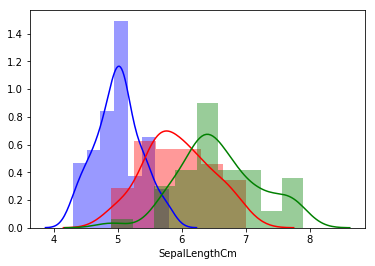

In [72]:
sns.distplot( df[df['Species']==1]['SepalLengthCm'] , color="blue")
sns.distplot( df[df['Species']==2]['SepalLengthCm'] , color="red")
sns.distplot( df[df['Species']==3]['SepalLengthCm'] , color="green")

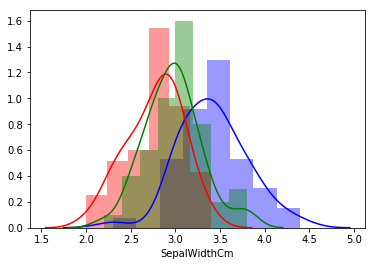

In [73]:
sns.distplot( df[df['Species']==1]['SepalWidthCm'] , color="blue")
sns.distplot( df[df['Species']==2]['SepalWidthCm'] , color="red")
sns.distplot( df[df['Species']==3]['SepalWidthCm'] , color="green")

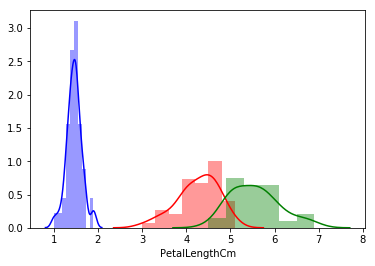

In [74]:
sns.distplot( df[df['Species']==1]['PetalLengthCm'] , color="blue")
sns.distplot( df[df['Species']==2]['PetalLengthCm'] , color="red")
sns.distplot( df[df['Species']==3]['PetalLengthCm'] , color="green")

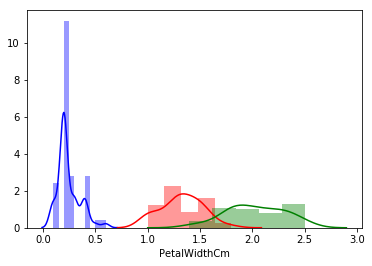

In [75]:
sns.distplot( df[df['Species']==1]['PetalWidthCm'] , color="blue")
sns.distplot( df[df['Species']==2]['PetalWidthCm'] , color="red")
sns.distplot( df[df['Species']==3]['PetalWidthCm'] , color="green")

From just looking at these simple graphical representations of the features, we can already tell that the petal lengths and widths are likely better suited as potential features two separate between the three flower classes.

## Step 1: Computing the d-dimensional mean vectors

In this first step, we will start off with a simple computation of the mean vectors mmi, (i=1,2,3) of the 3 different flower classes:

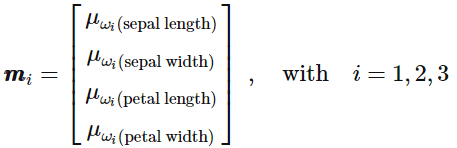

In [109]:
mean_class_1 = []
mean_class_2 = []
mean_class_3 = []

In [110]:
for i in range(X.shape[1]):
    mean_class_1.append(np.mean(df[df['Species']==1].iloc[:,i]))
    mean_class_2.append(np.mean(df[df['Species']==2].iloc[:,i]))
    mean_class_3.append(np.mean(df[df['Species']==3].iloc[:,i]))

In [114]:
mean_class_1

[5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999]

In [115]:
mean_class_2

[5.936, 2.7700000000000005, 4.26, 1.3259999999999998]

In [116]:
mean_class_3

[6.587999999999998, 2.9739999999999998, 5.552, 2.026]

In [123]:
mean_vectors = np.array([mean_class_1,mean_class_2,mean_class_3])
mean_vectors

array([[5.006, 3.418, 1.464, 0.244],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

## Step 2: Computing the Scatter Matrices

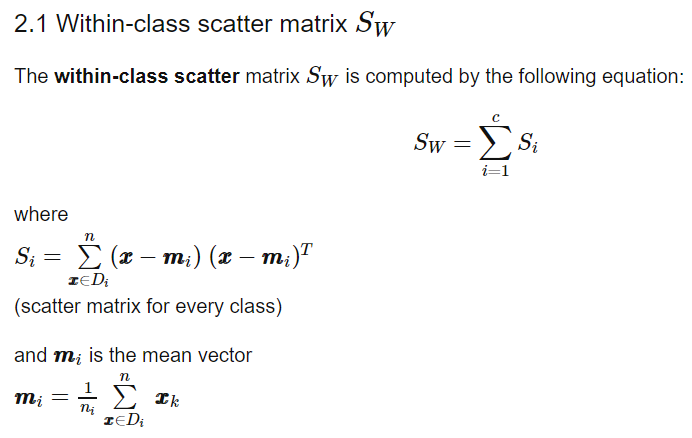

In [195]:
S_W = np.zeros((4,4))

for Class,meanVector in zip(range(1,4),mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in np.array(df[df['Species']==Class]):
        row = row[0:4].reshape(4,1)
        meanVector = meanVector.reshape(4,1)
        class_sc_mat += (row-meanVector).dot((row-meanVector).T)
    S_W += class_sc_mat

print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


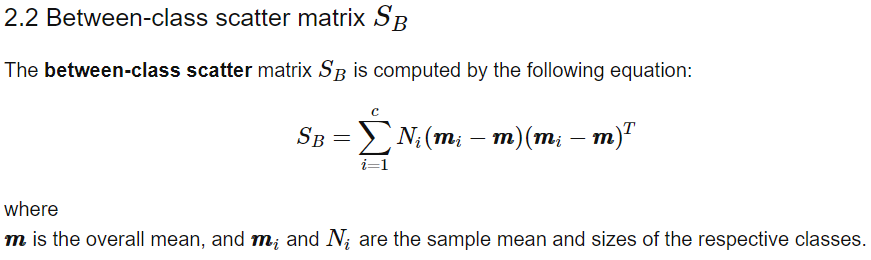

In [205]:
overall_mean = []

In [208]:
for i in range(X.shape[1]):
    overall_mean.append(np.mean(df.iloc[:,i]))

In [209]:
overall_mean

[5.843333333333335, 3.0540000000000007, 3.7586666666666693, 1.1986666666666672]

In [216]:
S_B = np.zeros((4,4))
for Class,meanVector in zip(range(1,4),mean_vectors):
    n = df[df['Species']==Class].shape[0]
    meanVector = meanVector.reshape(4,1)
    overall_mean = np.array(overall_mean).reshape(4,1)
    S_B += n * (meanVector - overall_mean).dot((meanVector - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


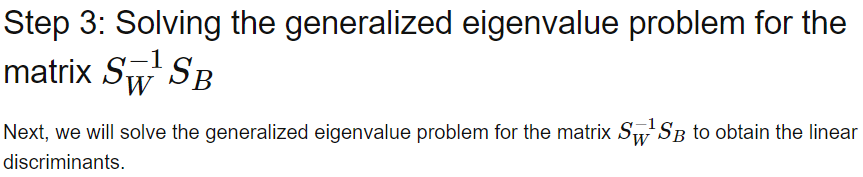

In [217]:
Sw_inverse = np.linalg.inv(S_W)

In [218]:
Sw_inverse_mul_Sb = np.dot(Sw_inverse,S_B)

In [220]:
eig_vals,eig_vecs = np.linalg.eig(Sw_inverse_mul_Sb)

In [223]:
eig_vecs

array([[-0.2049+0.j    , -0.009 +0.j    ,  0.6104+0.j    ,
         0.6104-0.j    ],
       [-0.3871+0.j    , -0.589 +0.j    , -0.3325+0.2066j,
        -0.3325-0.2066j],
       [ 0.5465+0.j    ,  0.2543+0.j    , -0.3415+0.2491j,
        -0.3415-0.2491j],
       [ 0.7138+0.j    , -0.767 +0.j    ,  0.1585-0.52j  ,
         0.1585+0.52j  ]])

In [224]:
eig_vals

array([3.2272e+01+0.0000e+00j, 2.7757e-01+0.0000e+00j,
       1.4814e-15+6.4455e-15j, 1.4814e-15-6.4455e-15j])

In [221]:
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.2049]
 [-0.3871]
 [ 0.5465]
 [ 0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[ 0.6104]
 [-0.3325]
 [-0.3415]
 [ 0.1585]]
Eigenvalue 3: 1.48e-15

Eigenvector 4: 
[[ 0.6104]
 [-0.3325]
 [-0.3415]
 [ 0.1585]]
Eigenvalue 4: 1.48e-15


## Step 4: Selecting linear discriminants for the new feature subspace

### 4.1. Sorting the eigenvectors by decreasing eigenvalues

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.

In [225]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [226]:
eig_pairs

[(32.27195779972982,
  array([-0.2049+0.j, -0.3871+0.j,  0.5465+0.j,  0.7138+0.j])),
 (0.27756686384004503,
  array([-0.009 +0.j, -0.589 +0.j,  0.2543+0.j, -0.767 +0.j])),
 (6.613543721484293e-15,
  array([ 0.6104+0.j    , -0.3325+0.2066j, -0.3415+0.2491j,  0.1585-0.52j  ])),
 (6.613543721484293e-15,
  array([ 0.6104-0.j    , -0.3325-0.2066j, -0.3415-0.2491j,  0.1585+0.52j  ]))]

In [227]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

In [228]:
eig_pairs

[(32.27195779972982,
  array([-0.2049+0.j, -0.3871+0.j,  0.5465+0.j,  0.7138+0.j])),
 (0.27756686384004503,
  array([-0.009 +0.j, -0.589 +0.j,  0.2543+0.j, -0.767 +0.j])),
 (6.613543721484293e-15,
  array([ 0.6104+0.j    , -0.3325+0.2066j, -0.3415+0.2491j,  0.1585-0.52j  ])),
 (6.613543721484293e-15,
  array([ 0.6104-0.j    , -0.3325-0.2066j, -0.3415-0.2491j,  0.1585+0.52j  ]))]

In [229]:
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972982
0.27756686384004503
6.613543721484293e-15
6.613543721484293e-15


Now, let’s express the “explained variance” as percentage:

In [230]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


### 4.2. Choosing k eigenvectors with the largest eigenvalues

In [231]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2049 -0.009 ]
 [-0.3871 -0.589 ]
 [ 0.5465  0.2543]
 [ 0.7138 -0.767 ]]


## Step 5: Transforming the samples onto the new subspace

In the last step, we use the 4×2-dimensional matrix W that we just computed to transform our samples onto the new subspace via the equation

Y=X × W.

(where X is a n×d-dimensional matrix representing the n samples, and Y are the transformed n×k-dimensional samples in the new subspace).

In [233]:
X_lda = X.dot(W)

In [245]:
x_lda = np.array(X_lda)

F:\Anaconda\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


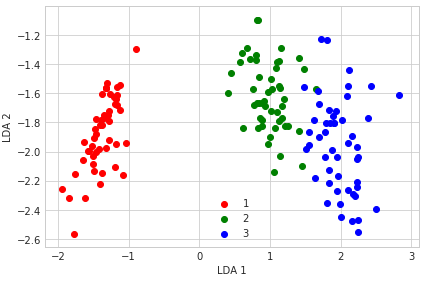

In [247]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for label,color in zip(np.unique(df['Species']),colors):
        plt.scatter(x_lda[df['Species']==label,0],x_lda[df['Species']==label,1],c=color,label=label)

    plt.xlabel('LDA 1')
    plt.ylabel('LDA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()

## Applying Logistic Regression

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [249]:
logisticRegression = LogisticRegression()

In [262]:
X = np.array(np.abs(X_lda))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=20)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [266]:
logisticRegression.fit(X_train,y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [268]:
y_pred = logisticRegression.predict(X_test)

In [270]:
accuracy_score(y_test,y_pred)

0.9

F:\Anaconda\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


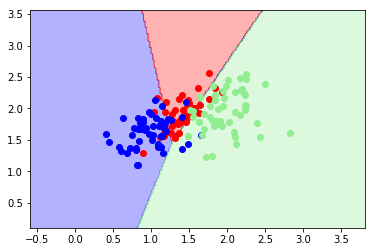

In [282]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(df['Species'])])
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
Z = logisticRegression.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
for idx, cl in enumerate(np.unique(np.array(pd.Categorical(df['Species']).codes))):
    plt.scatter(x=x_lda[df['Species'] == cl, 0], 
                    y=x_lda[df['Species'] == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
for label,color in zip(np.unique(df['Species']),colors):
        plt.scatter(X[df['Species']==label,0],X[df['Species']==label,1],c=color,label=label)